# Perceptrons theorem

In [2]:
class Perceptron:
    def __init__(self, num_inputs, activation_f, error_f):
        # self.weights = np.random.rand(num_inputs)
        # self.bias = np.random.rand(0)
        self.weights = np.zeros(num_inputs)
        self.bias = 0
        self.activation = activation_f
        self.error = error_f

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return total
    
    def predict(self, inputs):
        return self.activation(np.dot(self.weights, inputs) + self.bias)
        
    def train(self, training_inputs, reals, learning_rate, epochs):
        for _ in range(epochs):
            for inputs, real in zip(training_inputs, reals):
                prediction = self.feedforward(inputs)
                # 0 is 1, 1 is 2
                if real == 1 and prediction > 0:
                    self.weights -= learning_rate * inputs
                if real == 0 and prediction <= 0:
                    self.weights += learning_rate * inputs


In [3]:
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        

In [4]:
(x_train_raw, y_train_raw),(x_test_raw, y_test_raw) = MnistDataloader(
    "data/mnist/train-images.idx3-ubyte",
    "data/mnist/train-labels.idx1-ubyte",
    "data/mnist/t10k-images.idx3-ubyte",
    "data/mnist/t10k-labels.idx1-ubyte"
    ).load_data()

In [5]:
x_train_raw = np.array(x_train_raw).reshape(60000, 28*28)
y_train_raw = np.array(y_train_raw)
x_test_raw = np.array(x_test_raw).reshape(10000, 28*28)
y_test_raw = np.array(y_test_raw)

In [6]:
# ones = y_train == 1
# twos = y_train == 2
y_train = y_train_raw
x_train = x_train_raw

ones = y_train == 1
twos = y_train == 2

In [8]:
errorf = lambda p, r: (p - r)**2 / 2
ps = [Perceptron(28 * 28, lambda x: 1 if x >= 0 else -1, errorf) for _ in range(10)]
for i, p in enumerate(ps):
    p.train(x_train, y_train == i, 10, 2)

In [9]:
y_test = y_test_raw
x_test = x_test_raw
x_test.shape

(10000, 784)

In [10]:
pred_correct = 0
N = x_test.shape[0]
errors = {i: 0 for i in range(10)}
for i_t, x in enumerate(x_test[:N, :]):
    min_ind = 0
    min_val = float("inf")
    for i, p in enumerate(ps):
        predict = p.feedforward(x)
        if min_val > predict:
            min_val = predict
            min_ind = i
    is_correct = min_ind == y_test[i_t]
    errors[y_test[i_t]] += min_ind != y_test[i_t]
    pred_correct += is_correct
pred_correct / N, errors

(0.851,
 {0: 41, 1: 22, 2: 243, 3: 67, 4: 200, 5: 282, 6: 41, 7: 151, 8: 341, 9: 102})

<BarContainer object of 10 artists>

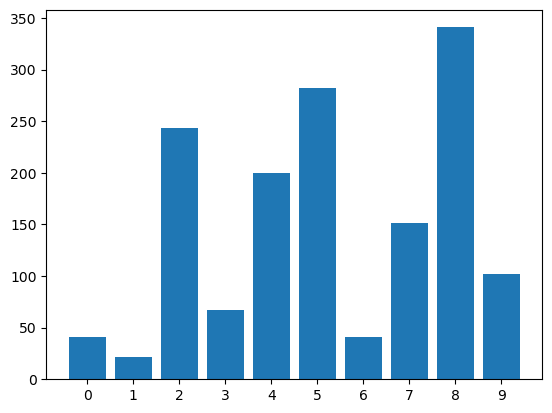

In [11]:
import matplotlib.pyplot as plt
plt.xticks(range(10))
plt.bar(errors.keys(), errors.values())